# Trajectory

Trajectories are computed by solving the geodesic equation in Kerr spacetime, which in Boyer-Lindquist coordinates can be written as the following system of differential equations.
\begin{equation}
\begin{aligned} & \Sigma^2\left(\frac{\mathrm{d} r}{\mathrm{~d} \tau}\right)^2=\left(\mathcal{E}\left(r^2+a^2\right)-a \mathcal{L}\right)^2-\Delta\left(r^2+(a \mathcal{E}-\mathcal{L})^2+Q\right)\\ & \Sigma^2\left(\frac{\mathrm{d} z}{\mathrm{d} \tau}\right)^2=Q-z^2\left(a^2\left(1-\mathcal{E}^2\right)\left(1-z^2\right)+\mathcal{L}^2+Q\right) \\ & \Sigma \frac{\mathrm{d} t}{\mathrm{~d} \tau}=\frac{\left(r^2+a^2\right)}{\Delta}\left(\mathcal{E}\left(r^2+a^2\right)-a \mathcal{L}\right)-a^2 \mathcal{E}\left(1-z^2\right)+a \mathcal{L}\\ & \Sigma \frac{\mathrm{d} \phi}{\mathrm{d} \tau}=\frac{a}{\Delta}\left(\mathcal{E}\left(r^2+a^2\right)-a \mathcal{L}\right)+\frac{\mathcal{L}}{1-z^2}-a \mathcal{E} 
\end{aligned}
\end{equation}
Here, $\Delta=r^2-2 M r+a^2$, $\Sigma=r^2+a^2 \cos ^2 \theta$ and $z = \cos{\theta}$. $\mathcal{E}$, $\mathcal{L}$, and $\mathcal{Q}$ represent the energy, angular momentum, and Carter constant respectively. In order to solve this system analytically, the trajectory must be reparametrized in terms of a new parameter $\lambda$ which is defined such that $\frac{d\tau}{d\lambda} = \Sigma$. This new parameter is known as Mino time.

## Stable Bound Orbits

For stable bound orbits, kerrgeopy uses the $(a,p,e,x)$ parametrization described in [Getting Started](stable-orbits). 


### Trajectory

To compute a trajectory, first construct a [`StableOrbit`](stable.StableOrbit) by specifying a set of orbital parameters $(a,p,e,x)$. Then use the [`trajectory()`](stable.StableOrbit.trajectory) method to compute the time, radial, polar and azimuthal components of the trajectory as a function of Mino time. Use the `initial_phases` option to set the initial phases $(q_{t_0},q_{r_0},q_{\theta_0},q_{\phi_0})$ of the orbit. Phases are defined as follows:

\begin{equation}
\begin{aligned}
q_t &= \Gamma \lambda\\
q_r &= \Upsilon_r \lambda \\
q_\theta &= \Upsilon_\theta \lambda\\
q_\phi &= \Upsilon_\phi \lambda
\end{aligned}
\end{equation}

By default, all initial phases are set to zero and the trajectory is computed assuming that the orbit begins at the inner turning point, i.e. $(t_0,r_0,\theta_0,\phi_0) = (0, r_{\text{min}},\theta_{\text{min}},0)$. In order to start the orbit from $r_{\text{max}}$ instead, set $q_{r_0} = \pi$.

In [36]:
import kerrgeopy as kg
from math import cos, pi

orbit = kg.StableOrbit(0.9,5,0.6,cos(pi/3),initial_phases=(0,pi,0,0))

t, r, theta, phi = orbit.trajectory()

Text(0, 0.5, '$\\phi(\\lambda)$')

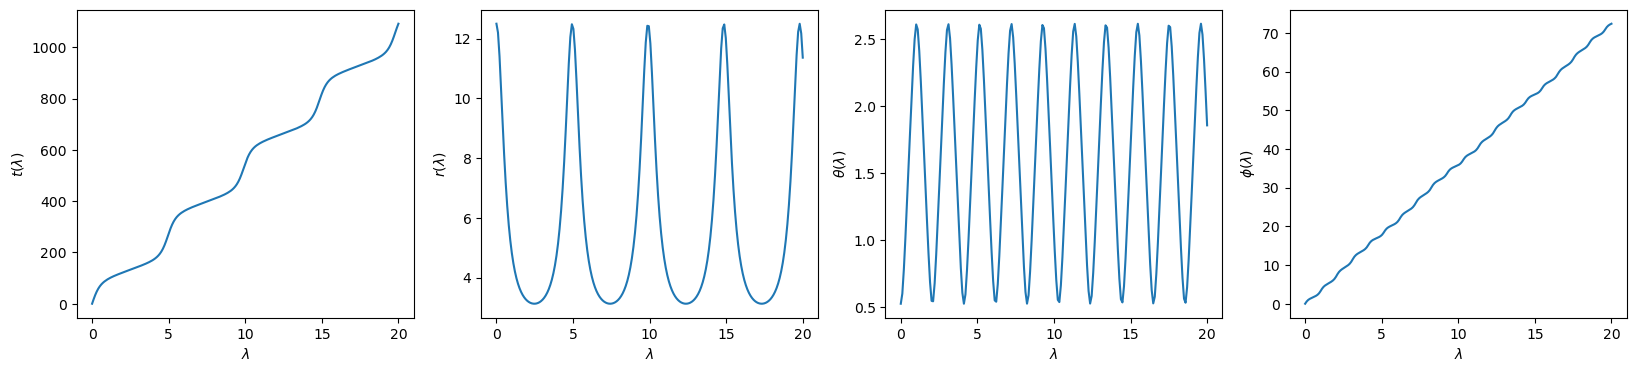

In [37]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,20,200)

plt.figure(figsize=(20,4))

plt.subplot(1,4,1)
plt.plot(time, t(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$t(\lambda)$")

plt.subplot(1,4,2)
plt.plot(time, r(time))
plt.xlabel("$\lambda$")
plt.ylabel("$r(\lambda)$")

plt.subplot(1,4,3)
plt.plot(time, theta(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\theta(\lambda)$")

plt.subplot(1,4,4)
plt.plot(time, phi(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\phi(\lambda)$")

## Plunging Orbits

Plunging orbits are parametrized using the $(a,\mathcal{E},\mathcal{L},\mathcal{Q})$ parametrization described in [Getting Started](plunging-orbits).

Construct a [`PlungingOrbit`](plunge.PlungingOrbit) by passing in these four parameters and use the [`trajectory()`](plunge.PlungingOrbit.trajectory) method to compute the trajectory. As with stable orbits, the `initial_phases` option sets the initial phases $(q_{t_0},q_{r_0},q_{\theta_0},q_{\phi_0})$ and the `distance_units` and `time_units` options can be used to specify units if `M` and `mu` are given. As with stable orbits, the trajectory is computed assuming the initial conditions $(t_0,r_0,\theta_0,\phi_0) = (0, r_{\text{min}},\theta_{\text{min}},0)$ when the initial phases are all set to zero. Note that this means certain classes of plunging orbits begin at the singularity by default. As a result, some methods by be unreliable near $\lambda=0$ for such orbits.

In [38]:
orbit = kg.PlungingOrbit(0.9, 0.94, 0.1, 12,initial_phases=(0,0,pi,0), M=1e6, mu=10)

t, r, theta, phi = orbit.trajectory(distance_units="au", time_units="mks")

Text(0, 0.5, '$\\phi(\\lambda)$')

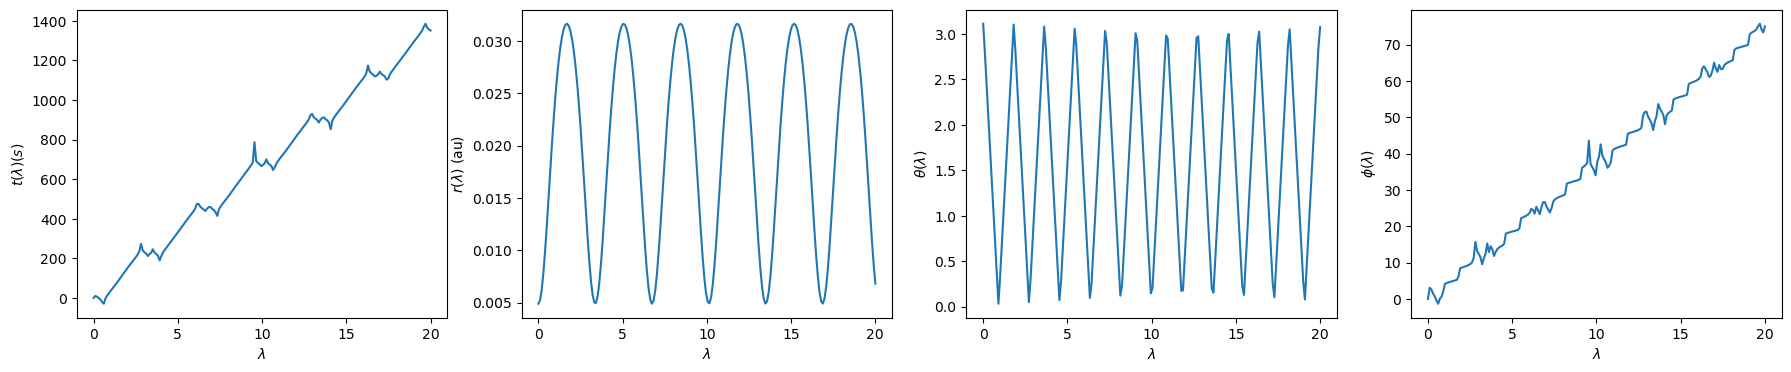

In [39]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,20,200)

plt.figure(figsize=(22,4))

plt.subplot(1,4,1)
plt.plot(time, t(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$t(\lambda) (s)$")

plt.subplot(1,4,2)
plt.plot(time, r(time))
plt.xlabel("$\lambda$")
plt.ylabel("$r(\lambda)$ (au)")

plt.subplot(1,4,3)
plt.plot(time, theta(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\theta(\lambda)$")

plt.subplot(1,4,4)
plt.plot(time, phi(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$\phi(\lambda)$")

## Four Velocity

Compute the four velocity as a function of Mino time for any orbit by using the [`four_velocity()`](orbit.Orbit.four_velocity) method. This method computes the components of the four velocity by plugging the trajectory and constants of motion for the orbit into the geodesic equation at the top of this page.

In [40]:
orbit = kg.StableOrbit(0.9,5,0.6,cos(pi/3))

u_t, u_r, u_theta, u_phi = orbit.four_velocity()

Text(0, 0.5, '$u^\\phi(\\lambda)$')

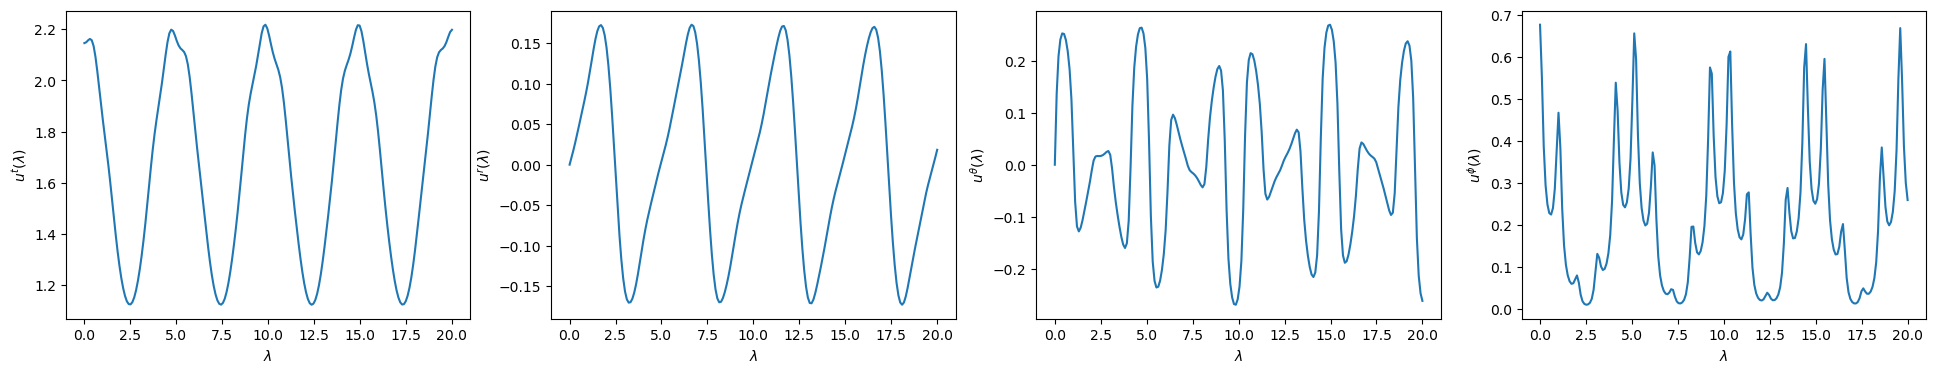

In [41]:
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0,20,200)

plt.figure(figsize=(24,4))

plt.subplot(1,4,1)
plt.plot(time, u_t(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$u^t(\lambda)$")

plt.subplot(1,4,2)
plt.plot(time, u_r(time))
plt.xlabel("$\lambda$")
plt.ylabel("$u^r(\lambda)$")

plt.subplot(1,4,3)
plt.plot(time, u_theta(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$u^\theta(\lambda)$")

plt.subplot(1,4,4)
plt.plot(time, u_phi(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$u^\phi(\lambda)$")

Alternatively, use the [`numerical_four_velocity()`](orbit.Orbit.numerical_four_velocity) method to compute the four velocity by numerically differentiating the trajectory. Adjust the `dx` parameter to change the step size used to take the derivative.

In [42]:
orbit = kg.StableOrbit(0.9,5,0.6,cos(pi/3))

u_t, u_r, u_theta, u_phi = orbit.numerical_four_velocity(dx=1e-5)

Text(0, 0.5, '$u^\\phi(\\lambda)$')

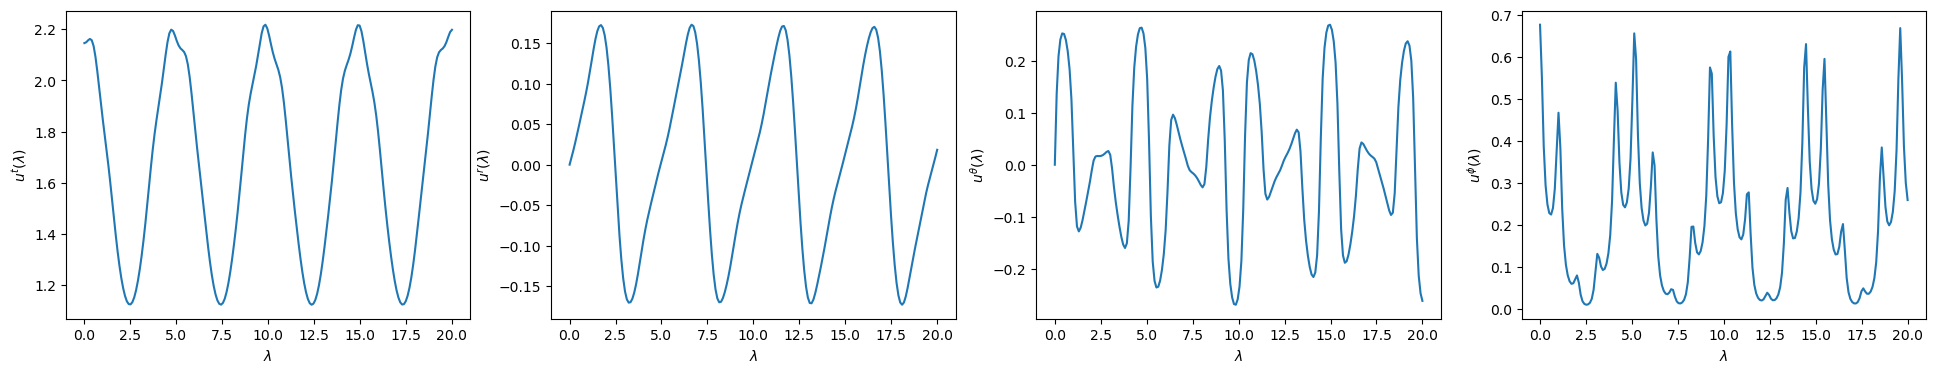

In [43]:
time = np.linspace(0,20,200)

plt.figure(figsize=(24,4))

plt.subplot(1,4,1)
plt.plot(time, u_t(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$u^t(\lambda)$")

plt.subplot(1,4,2)
plt.plot(time, u_r(time))
plt.xlabel("$\lambda$")
plt.ylabel("$u^r(\lambda)$")

plt.subplot(1,4,3)
plt.plot(time, u_theta(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$u^\theta(\lambda)$")

plt.subplot(1,4,4)
plt.plot(time, u_phi(time))
plt.xlabel("$\lambda$")
plt.ylabel(r"$u^\phi(\lambda)$")